In [700]:
# Visualization modules
import matplotlib.pyplot as plt
# Import data preprocessing modules
import pandas as pd
import seaborn as sns
%matplotlib inline

In [701]:
# Read the file
dataset = pd.read_csv('input/titanic.csv')
# Show the first 50 rows
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [702]:
# Observe the data shape
dataset.shape

(891, 12)

In [703]:
# Observe the data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [704]:
# Set seaborn as the default drawing library
sns.set()

In [705]:
def bar_chart(feature: str):
	survived = dataset[dataset['Survived'] == 1][feature].value_counts(ascending=True)
	dead = dataset[dataset['Survived'] == 0][feature].value_counts(ascending=True)
	df = pd.DataFrame([survived, dead])
	df.index = ['Survived', 'Dead']
	df.plot(kind='bar', stacked=True, figsize=(10, 5))

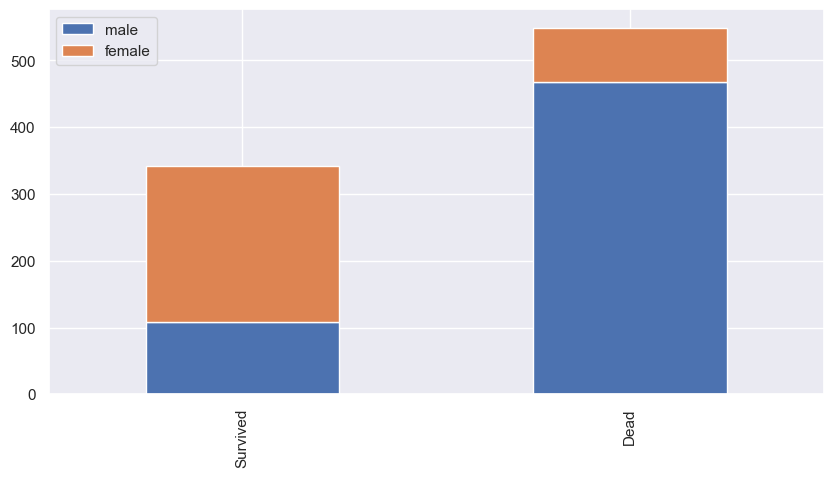

In [706]:
# Bar Chat of Survival/Dead Men and Women
bar_chart('Sex')

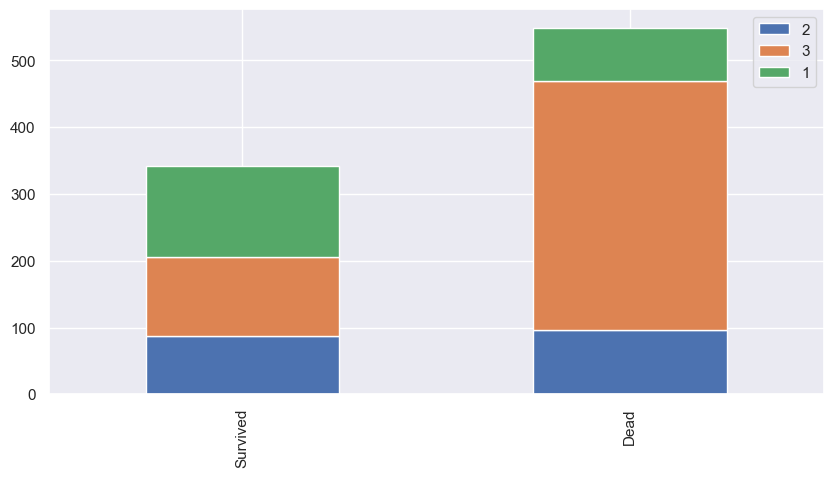

In [707]:
# Bar Chat of the Cabin of the Survival/Dead Person
bar_chart('Pclass')

In [708]:
# Calculate the number of “NaN” in the columns
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [709]:
# Observe the Name column
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [710]:
# Pick out Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# https://reurl.cc/qeZQE
# https://reurl.cc/Neb8n

In [711]:
# Count the Number of People by Each Title
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [712]:
# titlemapping
def title_mapping(title: str):
	titles = {'Mr': 0, 'Miss': 1, 'Mrs': 2}
	if title in titles.keys():
		return titles[title]
	return 3


dataset['Title'] = dataset['Title'].map(title_mapping)

In [713]:
# Current dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [714]:
# Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


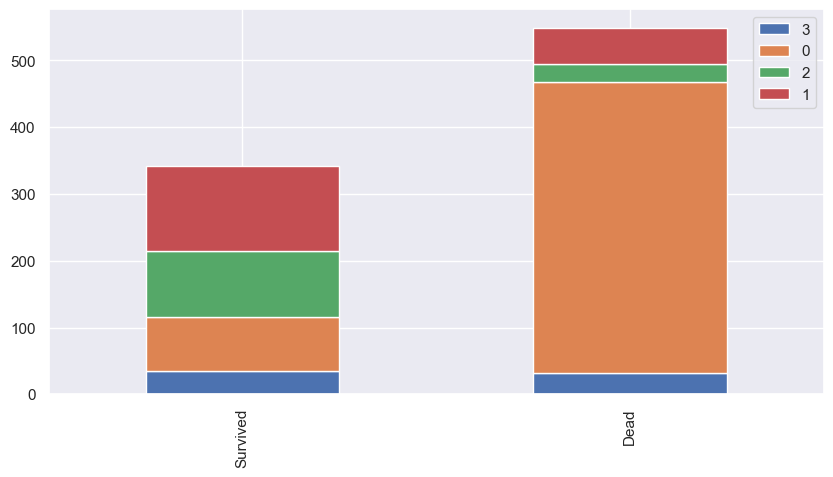

In [715]:
# Show the Distribution of Title/Survival and Dead
bar_chart('Title')

In [716]:
# Delete the "Name" column
dataset.drop('Name', axis=1, inplace=True)

In [717]:
# Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

In [718]:
# mapping sex
sex_mapping = {'male': 0, 'female': 1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

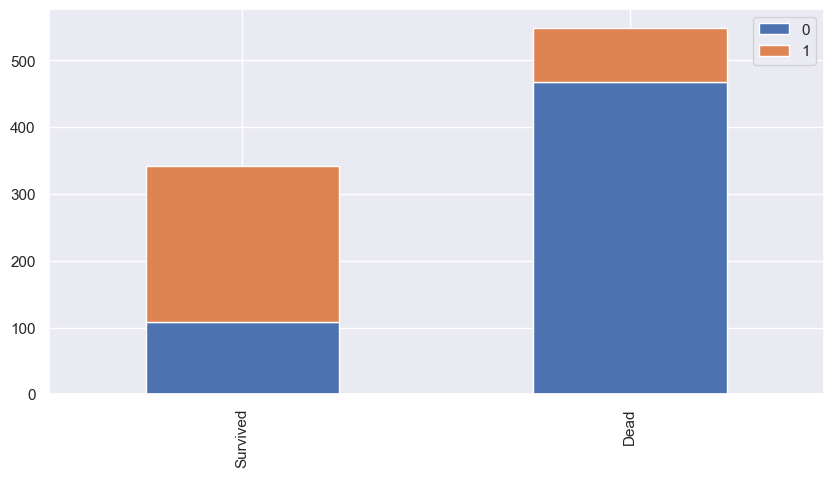

In [719]:
bar_chart('Sex')

In [720]:
# Current dataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


# Age

In [721]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace=True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

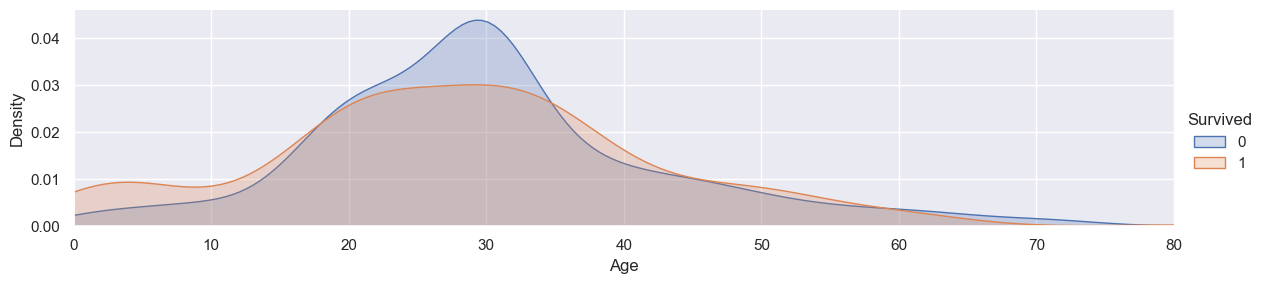

In [722]:
# Distribution of Age/Survival and Death
facet = sns.FacetGrid(dataset, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()

plt.show()

In [723]:
# Mapping Function According to the Range of Age
dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [724]:
# Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


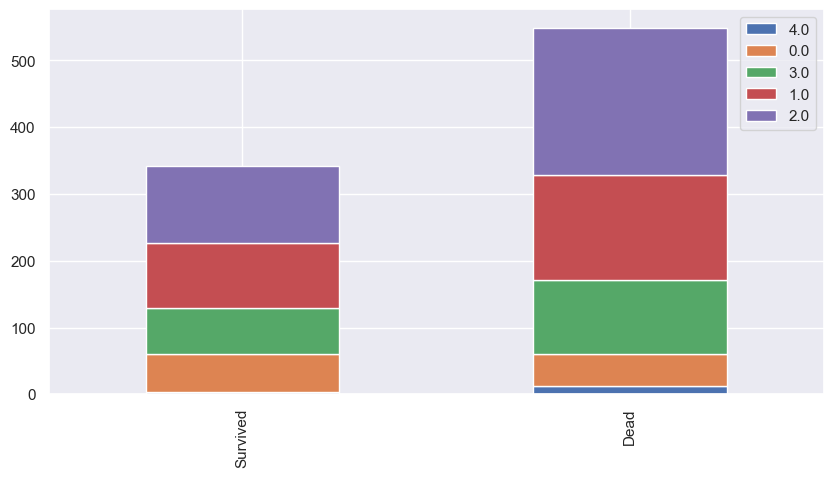

In [725]:
# Bar Chart of Age
bar_chart('Age')

# Embarked (登船地點)

<AxesSubplot: >

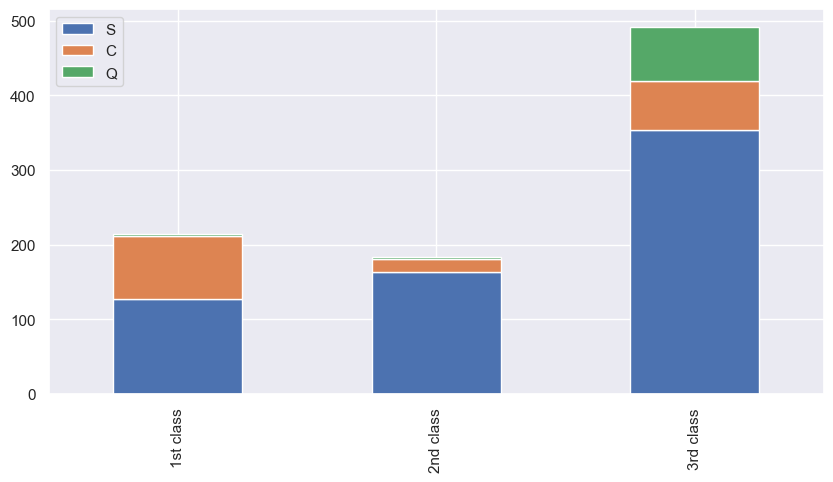

In [726]:
# Aalyze the Type of Boarding Tickets at Each Boarding Location
Pclass1 = dataset[dataset['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [727]:
# Fill Missing Value for Embarked Location
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2


In [728]:
# Mapping Function for the Embarked Location
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2


# Fare(票價)

In [729]:
# Fill in Missing Value for Fares
dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'), inplace=True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


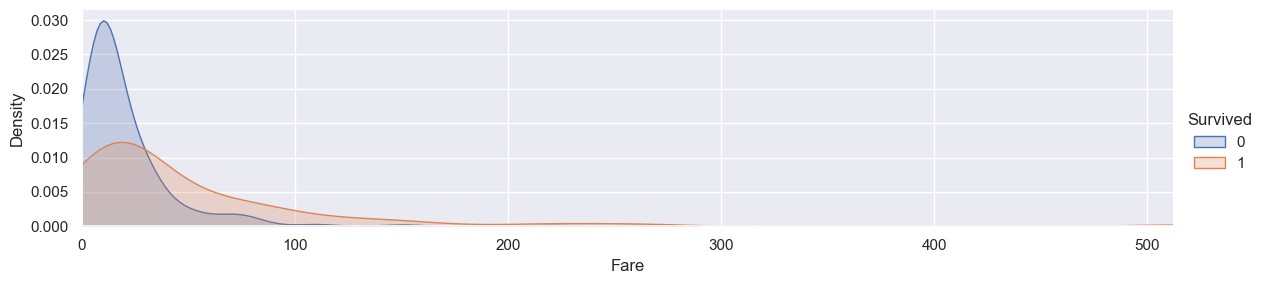

In [730]:
# Distribution of Fare/Survival and Death
facet = sns.FacetGrid(dataset, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()

plt.show()

In [731]:
# Mapping Function According to the Range of Fare
dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [732]:
#Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [733]:
# Observe the Cabin Number
dataset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [734]:
# Observe the Cabin Number =>Take out the first letter
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

<AxesSubplot: >

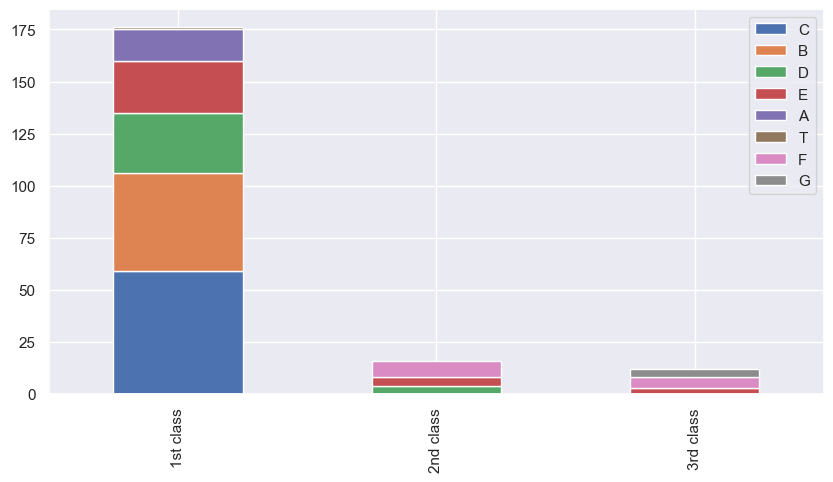

In [735]:
# Analyze the Number of People in Various Ticket Types and Cabin Types
Pclass1 = dataset[dataset['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [736]:
# Cabin Mapping
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [737]:
# Fill in the Missing Value on the Type of Cabin
dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [738]:
# Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


# Sibsp & Parch

In [739]:
# Combine Sibsp & Parch
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

(0.0, 11.0)

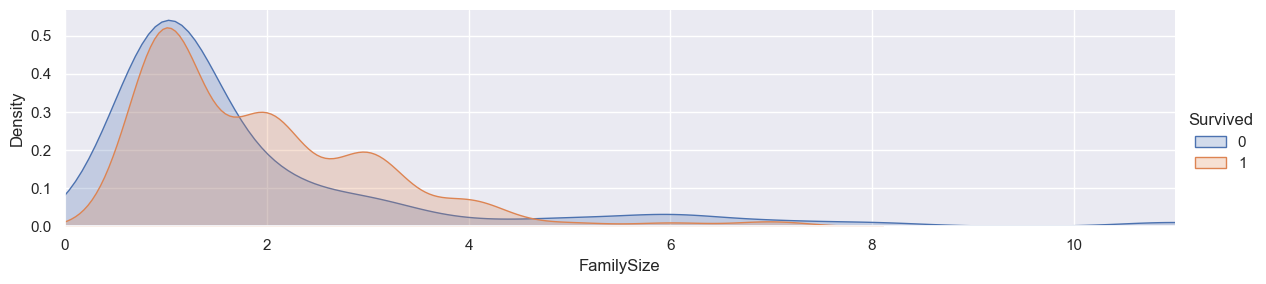

In [740]:
# Distribution of Family Population/Survival and Death
facet = sns.FacetGrid(dataset, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', fill=True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [741]:
# The Mapping Function of Family Population
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [742]:
# Current dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# Data Cleaning (資料清洗)

In [743]:
# Delete Sibsp, Parch, Ticket
feature_drop = ['Ticket', 'SibSp', 'Parch']
dataset = dataset.drop(feature_drop, axis=1)

In [744]:
# Set Target Variables and Explanatory Variables
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset[['Survived']]
dataset_data.shape, dataset_target.shape

((891, 9), (891, 1))

In [745]:
# All explanatory variables
dataset_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,3.0,2.0,0.8,1,2,0.4
2,3,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,2.0,2.0,0.8,0,2,0.4
4,5,3,0,2.0,0.0,2.0,0,0,0.0


In [746]:
# Check the types of every column in the training data.
# They should be numeric type.
dataset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   Title        891 non-null    int64  
 8   FamilySize   891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# Build the model-DNN

In [747]:
# Install Keras and Sklearn
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn import preprocessing

In [748]:
# Create Model Function
def build_model():
	model = Sequential()
	model.add(Dense(input_dim=9, units=40))
	model.add(Activation('relu'))
	model.add(Dense(units=100))
	model.add(Activation('relu'))
	model.add(Dense(units=10))
	model.add(Activation('relu'))
	model.add(Dense(units=1))
	model.add(Activation('sigmoid'))
	model.summary()

	return model

In [749]:
# Create a Drawing Function
def show_train_history(train_history, train, validation, label):
	plt.plot(train_history.history[train])
	plt.plot(train_history.history[validation])
	plt.title('Train History')
	plt.ylabel(label)
	plt.xlabel('Epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()

In [750]:
# Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures = minmax_scale.fit_transform(dataset_data)

In [751]:
model = build_model()
# Train Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target, validation_split=0.2, batch_size=30, epochs=20)
# Evaluate training result
score = model.evaluate(x=scaledFeatures, y=dataset_target)
print('\nTrain Loss:', score[0])
print('\nTrain Acc:', score[1])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 40)                400       
                                                                 
 activation_40 (Activation)  (None, 40)                0         
                                                                 
 dense_41 (Dense)            (None, 100)               4100      
                                                                 
 activation_41 (Activation)  (None, 100)               0         
                                                                 
 dense_42 (Dense)            (None, 10)                1010      
                                                                 
 activation_42 (Activation)  (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 1)               

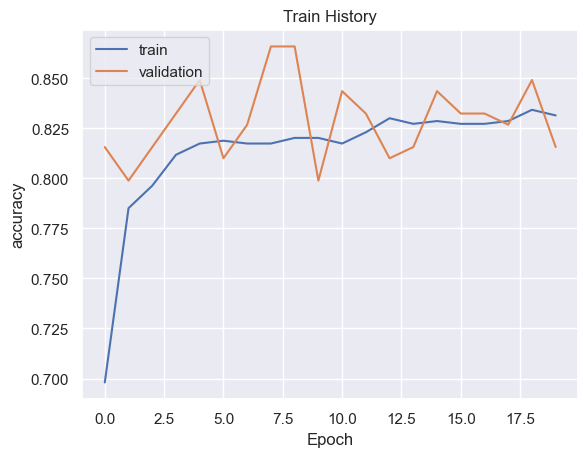

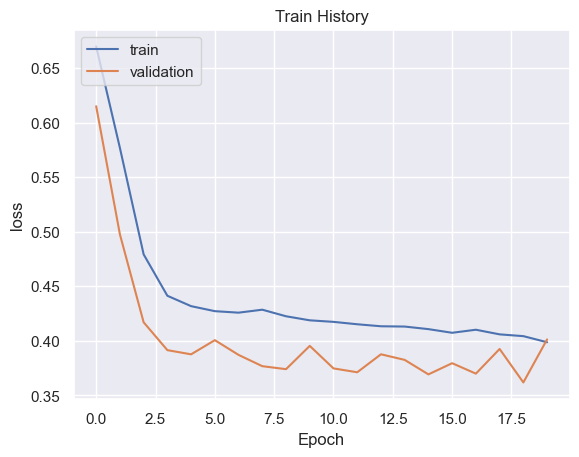

In [752]:
#Show Training Process
show_train_history(train_history, 'acc', 'val_acc', 'accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'loss')

# Test Model

In [753]:
# Preprocess the test data in the same way as the training data.
testdata = pd.read_csv('input/test-rosejack.csv')

In [754]:
# Name
testdata['Title'] = testdata['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


def title_mapping(title: str):
	titles = {'Mr': 0, 'Miss': 1, 'Mrs': 2}
	if title in titles.keys():
		return titles[title]
	return 3


testdata['Title'] = testdata['Title'].map(title_mapping)
testdata.drop('Name', axis=1, inplace=True)

In [755]:
# Sex
sex_mapping = {'male': 0, 'female': 1}
testdata['Sex'] = testdata['Sex'].map(sex_mapping)

In [756]:
# Age
testdata['Age'].fillna(testdata.groupby('Title')['Age'].transform('median'), inplace=True)
testdata.loc[testdata['Age'] <= 16, 'Age'] = 0
testdata.loc[(testdata['Age'] > 16) & (testdata['Age'] <= 26), 'Age'] = 1
testdata.loc[(testdata['Age'] > 26) & (testdata['Age'] <= 36), 'Age'] = 2
testdata.loc[(testdata['Age'] > 36) & (testdata['Age'] <= 62), 'Age'] = 3
testdata.loc[testdata['Age'] > 62, 'Age'] = 4

In [757]:
# Embarked (登船地點)
testdata['Embarked'] = testdata['Embarked'].fillna('S')
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
testdata['Embarked'] = testdata['Embarked'].map(embarked_mapping)

In [758]:
# Fare(票價)
testdata['Fare'].fillna(testdata.groupby('Pclass')['Fare'].transform('median'), inplace=True)
testdata.loc[testdata['Fare'] <= 17, 'Fare'] = 0
testdata.loc[(testdata['Fare'] > 17) & (testdata['Fare'] <= 30), 'Fare'] = 1
testdata.loc[(testdata['Fare'] > 30) & (testdata['Fare'] <= 100), 'Fare'] = 2
testdata.loc[testdata['Fare'] > 100, 'Fare'] = 3

In [759]:
# Cabin
testdata['Cabin'] = testdata['Cabin'].str[:1]
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
testdata['Cabin'] = testdata['Cabin'].map(cabin_mapping)
testdata['Cabin'].fillna(testdata.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [760]:
# FamilySize
testdata['FamilySize'] = testdata['SibSp'] + testdata['Parch'] + 1
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
testdata['FamilySize'] = testdata['FamilySize'].map(family_mapping)

In [761]:
# Data Cleaning (資料清洗)
feature_drop = ['Ticket', 'SibSp', 'Parch']
testdata = testdata.drop(feature_drop, axis=1)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  2 non-null      int64  
 1   Pclass       2 non-null      int64  
 2   Sex          2 non-null      int64  
 3   Age          2 non-null      float64
 4   Fare         2 non-null      float64
 5   Cabin        2 non-null      float64
 6   Embarked     2 non-null      int64  
 7   Title        2 non-null      int64  
 8   FamilySize   2 non-null      float64
dtypes: float64(4), int64(5)
memory usage: 272.0 bytes


In [762]:
# Use model.predict to predict the probability of survival
probability = model.predict(testdata)
probability

1/1 [==============================] - 0s 82ms/step


array([[0.00878501],
       [0.9423524 ]], dtype=float32)

In [763]:
# Obtain the weights of the model
W, b = model.layers[0].get_weights()
print('Weights = {}, \n\nbiases = {}'.format(W, b))

Weights = [[ 0.07573684 -0.14438927  0.21447174 -0.21611072 -0.01300918  0.01594563
  -0.14301784  0.06498313 -0.35516503  0.09495453 -0.0405083  -0.20617773
  -0.05726155  0.10928925  0.23150407  0.14114794  0.31227168  0.31778303
  -0.21300843 -0.15686318  0.14300172 -0.04178946  0.13586919  0.24309254
  -0.22018139 -0.11569213  0.31124023 -0.18159708  0.06785591 -0.01860397
   0.08881193  0.23633999 -0.3169267  -0.10217383 -0.18302566  0.10314244
  -0.13980952 -0.36406574  0.06491162  0.25692126]
 [ 0.10461645 -0.302209    0.09996127 -0.11499011  0.03387891  0.1578068
  -0.27560812  0.37723118  0.25291938  0.00892779  0.16171594  0.08606067
   0.22003716 -0.17355354 -0.24492796  0.28538018  0.239774    0.28296936
   0.37380028 -0.29262716 -0.30158004  0.01291506  0.1267775  -0.0624436
   0.3123771   0.2674754   0.34942877 -0.1231579   0.15061961  0.3262036
  -0.23846157 -0.14951336  0.11298566 -0.08555706 -0.0559179   0.34992352
   0.06335664 -0.14703497 -0.32637623 -0.43373343]
 [ 

In [764]:
# Save the model
model.save('result/dnnfortitanic.h5')

In [765]:
test = pd.read_csv('input/test.csv')
# Name
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [766]:
def title_mapping(title: str):
	titles = {'Mr': 0, 'Miss': 1, 'Mrs': 2}
	if title in titles.keys():
		return titles[title]
	return 3


test['Title'] = test['Title'].map(title_mapping)

In [767]:
test.drop('Name', axis=1, inplace=True)

In [768]:
# Sex
sex_mapping = {'male': 0, 'female': 1}
test['Sex'] = test['Sex'].map(sex_mapping)

In [769]:
# Age
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [770]:
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 26), 'Age'] = 1
test.loc[(test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 2
test.loc[(test['Age'] > 36) & (test['Age'] <= 62), 'Age'] = 3
test.loc[test['Age'] > 62, 'Age'] = 4

In [771]:
# Embarked (登船地點)
test['Embarked'] = test['Embarked'].fillna('S')

In [772]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [773]:
# Fare(票價)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [774]:
test.loc[test['Fare'] <= 17, 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[test['Fare'] > 100, 'Fare'] = 3

In [775]:
# Cabin
test['Cabin'] = test['Cabin'].str[:1]

In [776]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [777]:
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [778]:
# FamilySize
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [779]:
family_mapping: dict = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
test['FamilySize'] = test['FamilySize'].map(family_mapping)

In [780]:
# Data Cleaning (資料清洗)
feature_drop = ['Ticket', 'SibSp', 'Parch']
test = test.drop(feature_drop, axis=1)

In [781]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [782]:
predictions = model.predict(test)
predictions

14/14 [==============================] - 0s 1ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [783]:
predictions = predictions.flatten()

In [784]:
testdata_write = pd.read_csv('input/test.csv')
submission = pd.DataFrame({
	'PassengerId': testdata_write['PassengerId'],
	'Survived': predictions
})
submission['Survived'] = submission['Survived'].astype(int)
submission.to_csv('result/submission.csv', index=False)
